In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("dft_traffic_counts_aadf.csv") 

C:\Users\Nicolas\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
pd.set_option('display.max_columns', None)
data.head()

count_point_id  year  region_id region_name region_ons_code  \
0              51  2000          1  South West       E12000009   
1              52  2000          1  South West       E12000009   
2              53  2000          1  South West       E12000009   
3              54  2000          1  South West       E12000009   
4              55  2000          1  South West       E12000009   

   local_authority_id local_authority_name local_authority_code road_name  \
0                   1      Isles of Scilly            E06000053     A3111   
1                   1      Isles of Scilly            E06000053     A3112   
2                   1      Isles of Scilly            E06000053     A3111   
3                   1      Isles of Scilly            E06000053     A3110   
4                   1      Isles of Scilly            E06000053     A3110   

  road_category road_type start_junction_road_name end_junction_road_name  \
0            PA     major      Pierhead, Hugh Town                  A3112   
1            PA     major                    A3111                  A3110   
2            PA     major                    A3112                  A3110   
3            PA     major                    A3111                  A3112   
4            PA     major                    A3111                  A3112   

   easting  northing   latitude  longitude  link_length_km  link_length_miles  \
0    90200     10585  49.915023  -6.317073             0.3               0.19   
1    91000     10240  49.912343  -6.305686             2.0               1.24   
2    91000     10775  49.917141  -6.306114             1.2               0.75   
3    91515     10820  49.917810  -6.298996             0.2               0.12   
4    91800     10890  49.918585  -6.295094             4.0               2.49   

  estimation_method                         estimation_method_detailed  \
0         Estimated  Estimated using previous year's AADF on this link   
1         Estimated  Estimated using previous year's AADF on this link   
2         Estimated  Estimated using previous year's AADF on this link   
3         Estimated  Estimated using previous year's AADF on this link   
4         Estimated  Estimated using previous year's AADF on this link   

   pedal_cycles  two_wheeled_motor_vehicles  cars_and_taxis  \
0           105                          87             837   
1            82                         246             617   
2           112                          98             491   
3            84                          66             465   
4           155                          30             401   

   buses_and_coaches  lgvs  hgvs_2_rigid_axle  hgvs_3_rigid_axle  \
0                 25   451                 30                  0   
1                 16   250                 11                  0   
2                 16   264                 15                  0   
3                 15   214                 14                  0   
4                 22    77                 27                  0   

   hgvs_3_or_4_articulated_axle  hgvs_4_or_more_rigid_axle  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   

   hgvs_5_articulated_axle  hgvs_6_articulated_axle  all_hgvs  \
0                        0                        0        30   
1                        0                        0        11   
2                        0                        0        15   
3                        0                        0        14   
4                        0                        0        27   

   all_motor_vehicles  
0                1430  
1                1140  
2                 884  
3                 774  
4                 557

In [4]:
data_arr = []
with open('dft_traffic_counts_aadf/dft_traffic_counts_aadf.csv') as csvfile:
    u_data = csv.reader(csvfile, delimiter=',')
    for row in u_data:
        data_arr.append(row)

In [5]:
data_arr[1]

['51',
 '2000',
 '1',
 'South West',
 'E12000009',
 '1',
 'Isles of Scilly',
 'E06000053',
 'A3111',
 'PA',
 'major',
 'Pierhead, Hugh Town',
 'A3112',
 '90200',
 '10585',
 '49.91502292',
 '-6.31707296',
 '0.30',
 '0.19',
 'Estimated',
 "Estimated using previous year's AADF on this link",
 '105',
 '87',
 '837',
 '25',
 '451',
 '30',
 '0',
 '0',
 '0',
 '0',
 '0',
 '30',
 '1430']

In [6]:
print(len(data_arr))
data_arr = np.array(data_arr[1:])
data_arr.shape

429056


(429055, 34)

In [7]:
region_year_vtype = {}
regions = []
for region, df_region in data.groupby('region_name'):
    regions.append(region)
    region_year_vtype[region] = {}
    for year, df_reg_year in df_region.groupby('year'):
        region_year_vtype[region][year] = df_reg_year[['link_length_km', 'pedal_cycles','two_wheeled_motor_vehicles', 'cars_and_taxis', 'buses_and_coaches', 'lgvs', 'all_hgvs']]

In [8]:
region_year_vtype

{'East Midlands': {2000:        link_length_km  pedal_cycles  two_wheeled_motor_vehicles  \
  345               3.2             0                         274   
  346               7.4             0                         228   
  347               2.0             0                         299   
  374               9.0             0                          28   
  402               2.6             0                          96   
  ...               ...           ...                         ...   
  19931             NaN            63                          85   
  19934             NaN             8                          16   
  19935             NaN             0                           7   
  19941             NaN             1                          54   
  19944             NaN            11                          13   
  
         cars_and_taxis  buses_and_coaches   lgvs  all_hgvs  
  345             59531                399   9602     16939  
  346             6560

In [9]:
region_year_vtype['East Midlands'][2005]

link_length_km  pedal_cycles  two_wheeled_motor_vehicles  \
104499             3.2             0                         309   
104500             7.4             0                         257   
104501             2.0             0                         262   
104528             9.0             0                          16   
104556             2.6             0                         170   
...                ...           ...                         ...   
126214             NaN            49                          61   
126215             NaN            41                          28   
126216             NaN             1                           6   
126222             NaN             3                          53   
126225             NaN             5                           5   

        cars_and_taxis  buses_and_coaches   lgvs  all_hgvs  
104499           68649                286  11508     17721  
104500           66466                352   9716     14642  
104501           84163                345  15546     18003  
104528            7660                 36   1041      1791  
104556           26005                 85   4529      6890  
...                ...                ...    ...       ...  
126214            4422                 64    575        61  
126215            1423                 14    181        71  
126216             470                  2     49       103  
126222            2714                 39    451       148  
126225             859                 10    219       174  

[1660 rows x 7 columns]

In [10]:
reg_vtype_km = {}
for i in region_year_vtype.keys():
    reg_vtype_km[i] = {}
    for j in region_year_vtype[i].keys():
        pdc = region_year_vtype[i][j]['link_length_km'].sum()*region_year_vtype[i][j]['pedal_cycles'].sum()
        twmv = region_year_vtype[i][j]['link_length_km'].sum()*region_year_vtype[i][j]['two_wheeled_motor_vehicles'].sum()
        cat = region_year_vtype[i][j]['link_length_km'].sum()*region_year_vtype[i][j]['cars_and_taxis'].sum()
        bac = region_year_vtype[i][j]['link_length_km'].sum()*region_year_vtype[i][j]['buses_and_coaches'].sum()
        lgvs = region_year_vtype[i][j]['link_length_km'].sum()*region_year_vtype[i][j]['lgvs'].sum()
        hgvs = region_year_vtype[i][j]['link_length_km'].sum()*region_year_vtype[i][j]['all_hgvs'].sum()
        reg_vtype_km[i][j] = {'pedal_cycles': pdc,
                          'two_wheeled_motor_vehicles': twmv,
                          'cars_and_taxis': cat,
                          'buses_and_coaches': bac,
                          'lgvs': lgvs,
                          'all_hgvs': hgvs}


In [11]:
reg_vtype_km

{'East Midlands': {2000: {'pedal_cycles': 391388573.24,
   'two_wheeled_motor_vehicles': 776157236.6,
   'cars_and_taxis': 81475699231.59999,
   'buses_and_coaches': 908720629.76,
   'lgvs': 10832271756.039999,
   'all_hgvs': 8449914060.4},
  2001: {'pedal_cycles': 376088774.76,
   'two_wheeled_motor_vehicles': 818591658.12,
   'cars_and_taxis': 82453770500.4,
   'buses_and_coaches': 924773656.68,
   'lgvs': 11070512769.96,
   'all_hgvs': 8345274182.999999},
  2002: {'pedal_cycles': 367418658.88,
   'two_wheeled_motor_vehicles': 821092562.08,
   'cars_and_taxis': 84002218827.24,
   'buses_and_coaches': 926760473.24,
   'lgvs': 11486610724.960001,
   'all_hgvs': 8340634784.440001},
  2003: {'pedal_cycles': 446956317.36,
   'two_wheeled_motor_vehicles': 988578410.4,
   'cars_and_taxis': 87071126441.04,
   'buses_and_coaches': 918251580.96,
   'lgvs': 12509324382.24,
   'all_hgvs': 8362095194.88},
  2004: {'pedal_cycles': 379075644.45,
   'two_wheeled_motor_vehicles': 846751129.05,
   'ca

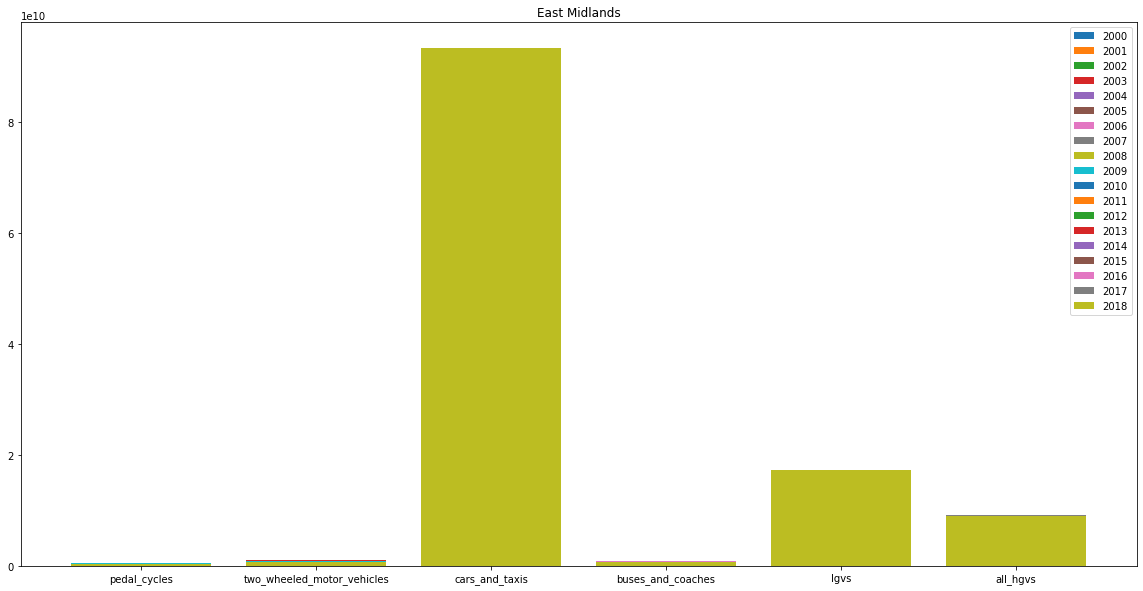

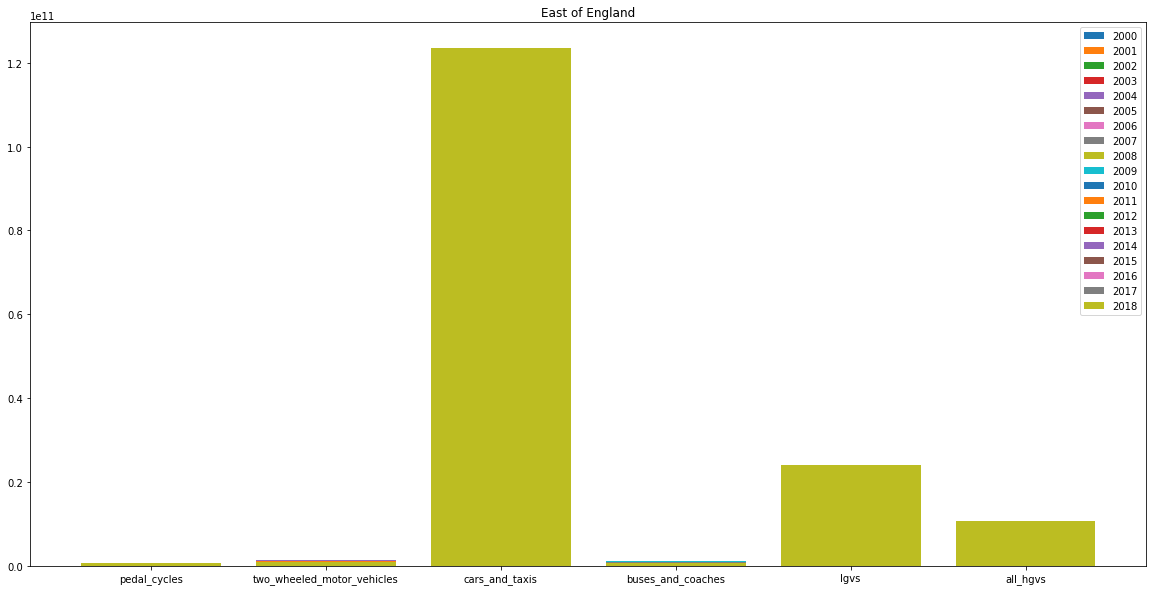

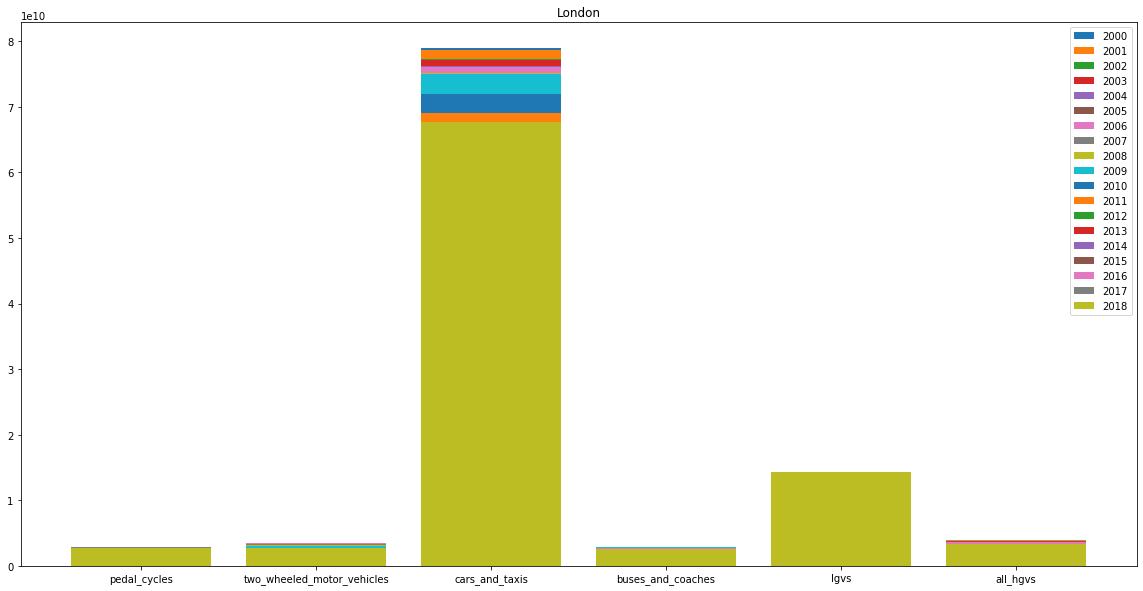

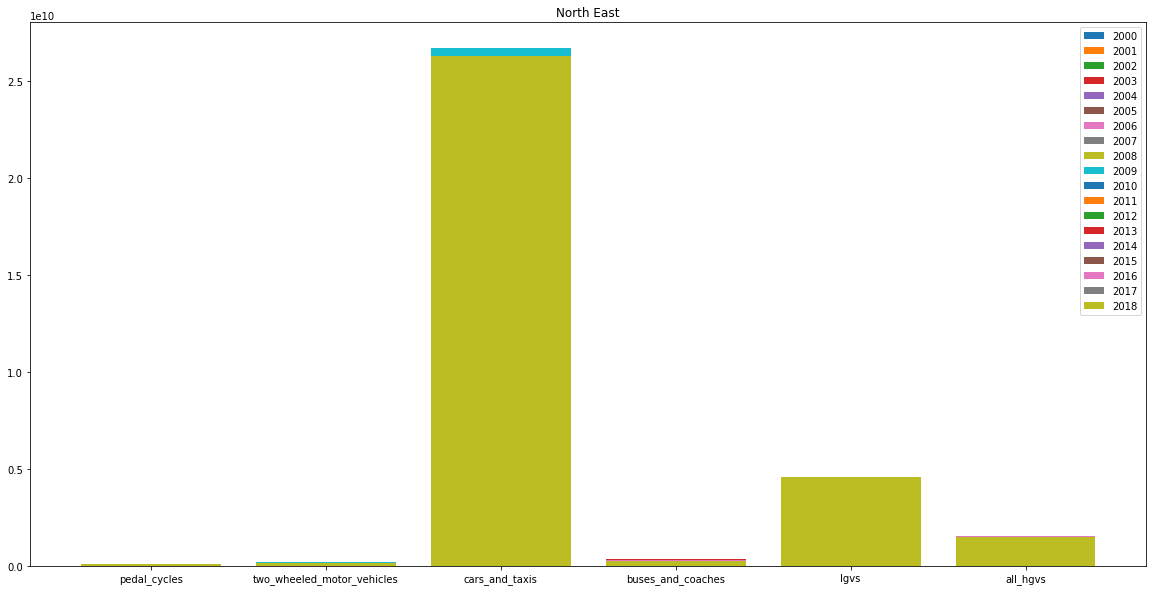

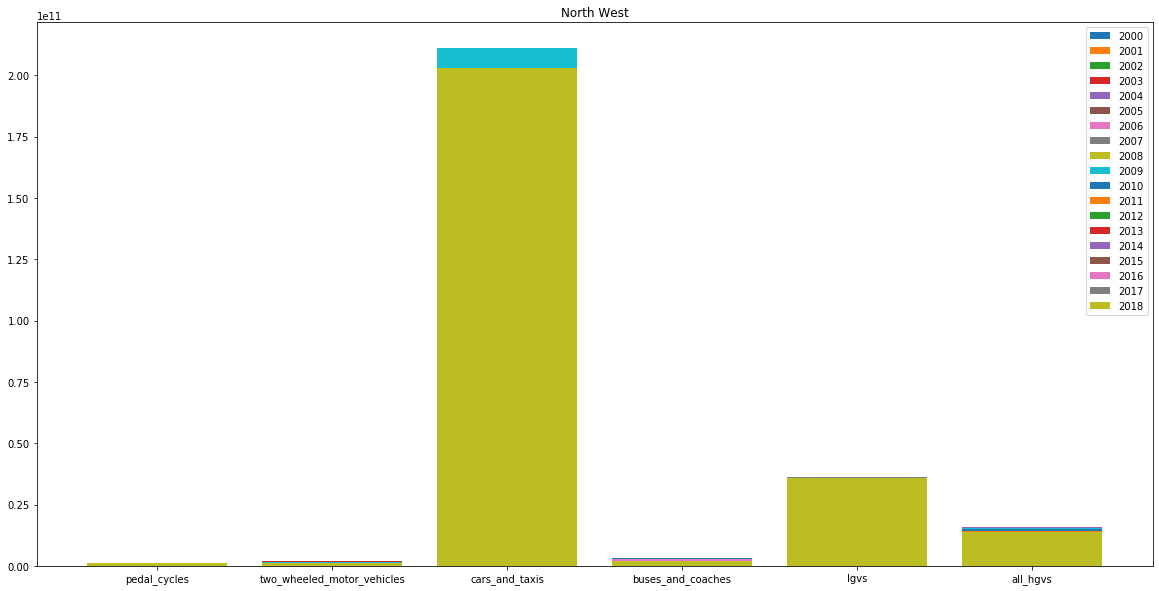

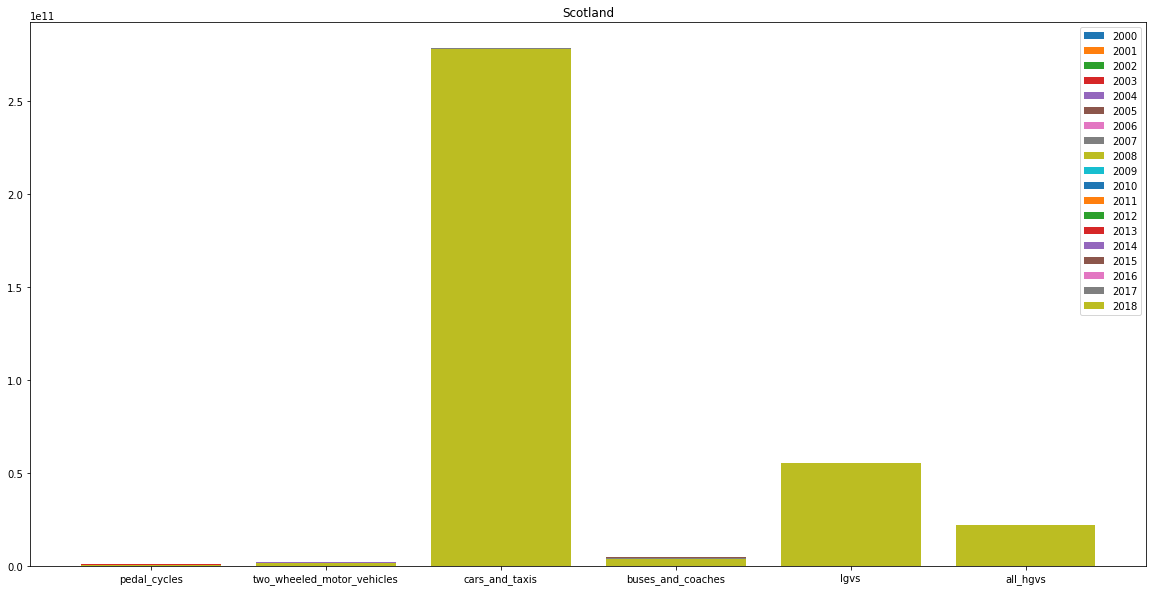

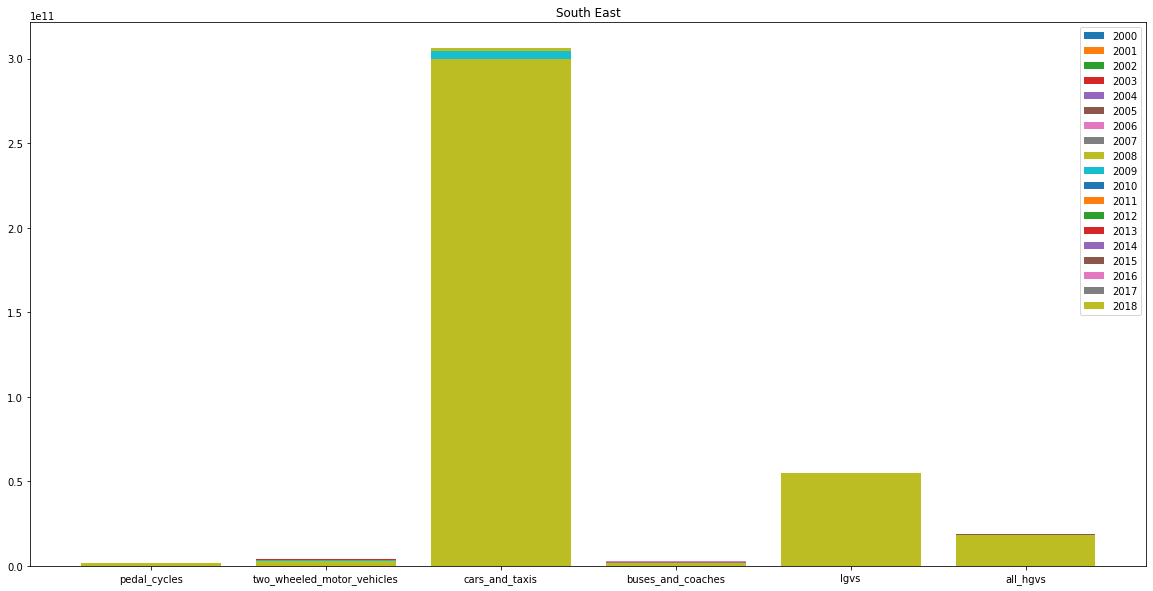

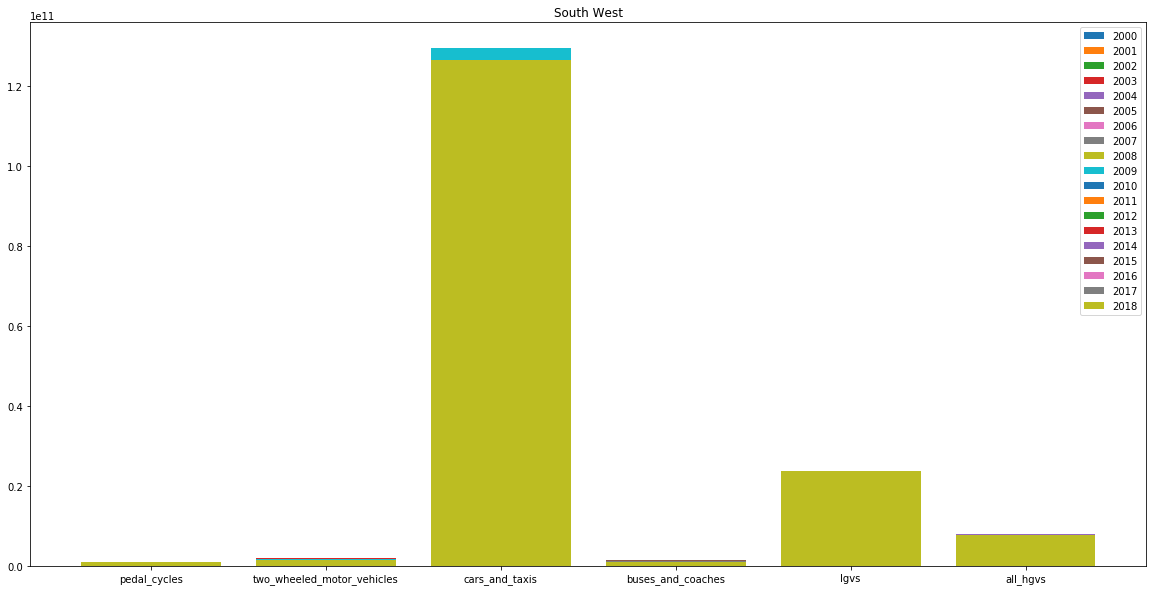

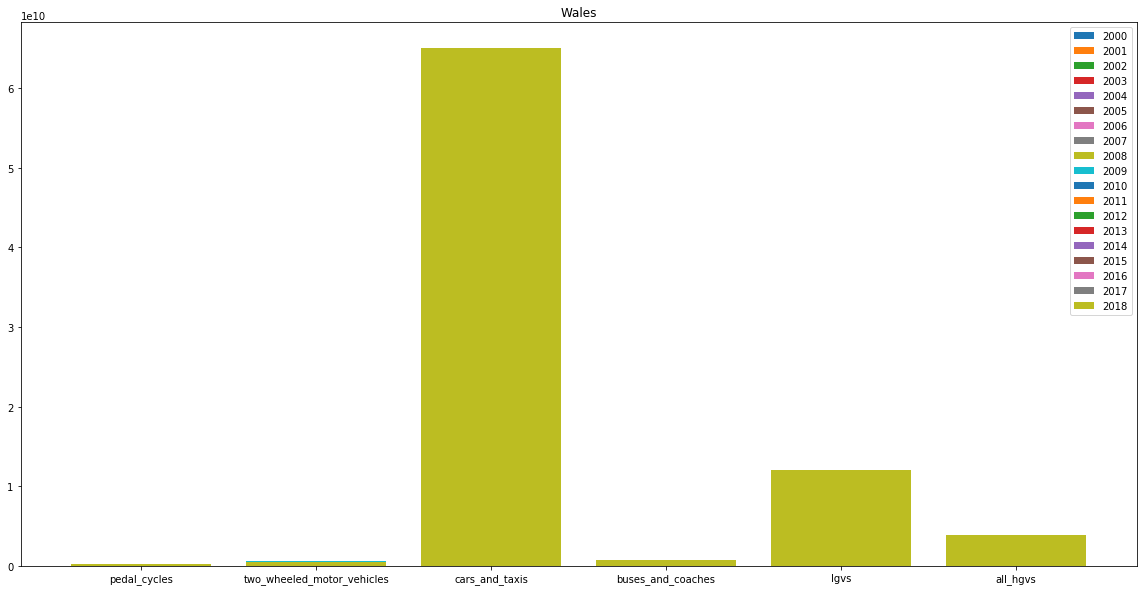

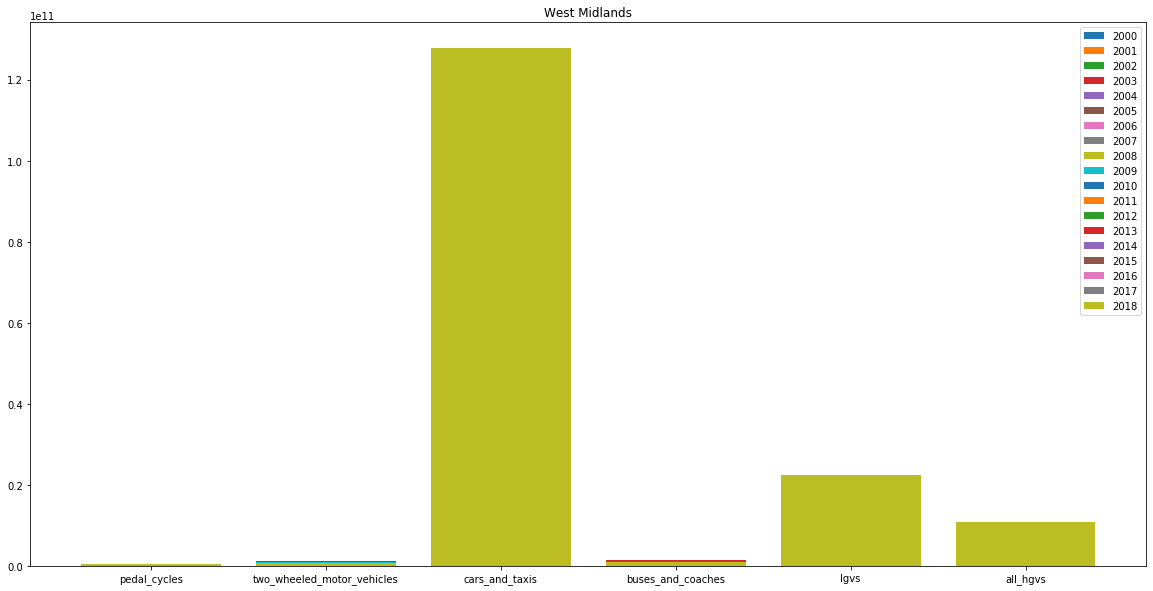

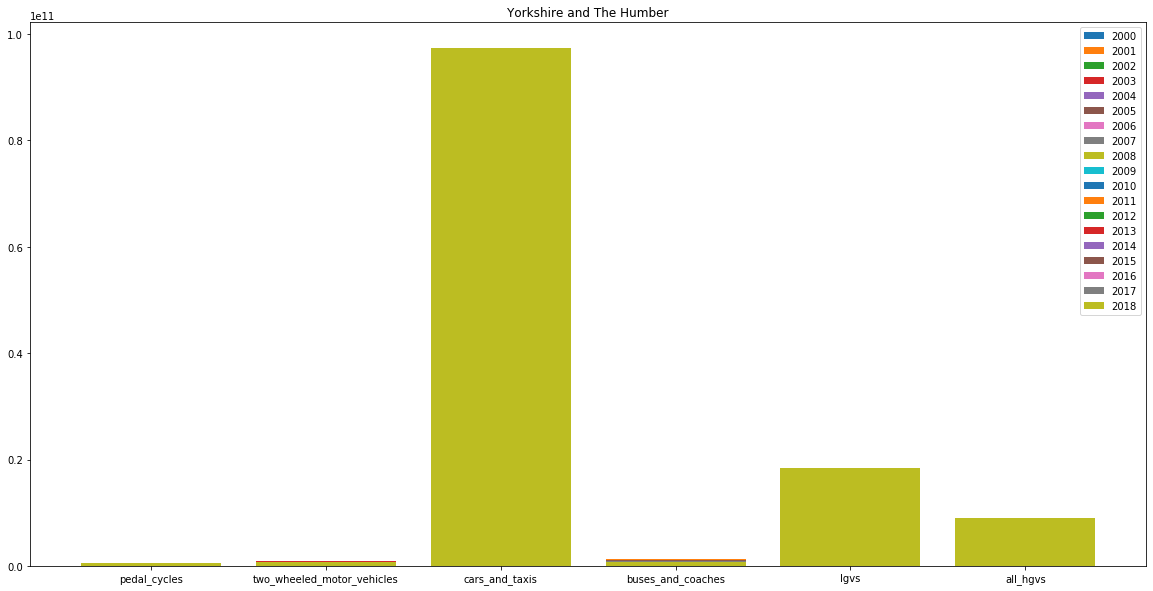

In [12]:
for i in reg_vtype_km.keys():
    plt.figure(figsize=(20,10))
    plt.title(i)
    for j in reg_vtype_km[i].keys():
        ph = reg_vtype_km[i][j]
        plt.bar(range(len(ph)), list(ph.values()))
        plt.xticks(range(len(ph)), list(ph.keys()))

    plt.legend(reg_vtype_km[i].keys())

In [13]:
all_data = []
for i in region_year_vtype.keys():
    ph = []
    for j in region_year_vtype[i].keys():
        ph2 = []
        ph2.append(365*region_year_vtype[i][j]['link_length_km'].sum()*region_year_vtype[i][j]['pedal_cycles'].sum())
        ph2.append(365*region_year_vtype[i][j]['link_length_km'].sum()*region_year_vtype[i][j]['two_wheeled_motor_vehicles'].sum())
        ph2.append(365*region_year_vtype[i][j]['link_length_km'].sum()*region_year_vtype[i][j]['cars_and_taxis'].sum())
        ph2.append(365*region_year_vtype[i][j]['link_length_km'].sum()*region_year_vtype[i][j]['buses_and_coaches'].sum())
        ph2.append(365*region_year_vtype[i][j]['link_length_km'].sum()*region_year_vtype[i][j]['lgvs'].sum())
        ph2.append(365*region_year_vtype[i][j]['link_length_km'].sum()*region_year_vtype[i][j]['all_hgvs'].sum())
        ph.append(ph2)
    all_data.append(ph)

In [14]:
#Regions 11
#East Midlands
#East of England
#London
#North East
#North West
#Scotland
#South East
#South West
#Wales
#West Midlands
#Yorkshire and The Humber

#Years 2000 - 2018 (19)

#Region[year[vtype[km]]]

all_data = np.array(all_data)
print(all_data.shape)

#Region[vtype[year[km]]]
r_v_y_km = np.einsum('abc->acb', all_data)
print(r_v_y_km.shape)
#vtype[year[km]]
v_y_km = np.einsum('abc->cb', r_v_y_km)
print(v_y_km.shape)
#sum for all vehicles except pedal cycles
no_pedal = v_y_km[:,1:]
y_km = np.einsum('ab->a',no_pedal)
print(y_km.shape)
#sum for only cars/taxis
cars = v_y_km[:,2]
print(cars[18])


(11, 19, 6)
(11, 6, 19)
(19, 6)
(19,)
550551166491469.0


In [15]:
km_1day_2018 = 550551166491469/365
n_cars = 32200000
km_1day_1car_2018 = km_1day_2018/n_cars
kWh_per_100 = 15
energy_1day = km_1day_1car_2018/100 * kWh_per_100
print(km_1day_1car_2018)

46843.45839287578


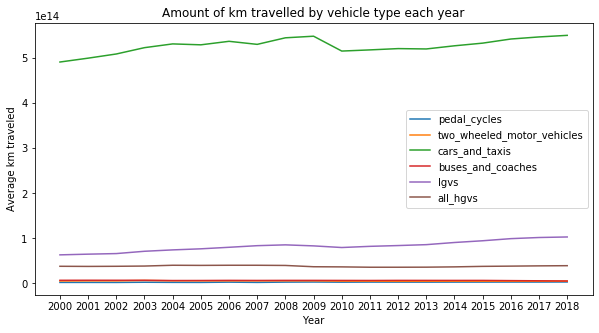

In [16]:
years = np.array([2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018])
vtypes = ['pedal_cycles', 'two_wheeled_motor_vehicles','cars_and_taxis','buses_and_coaches','lgvs','all_hgvs']
plt.figure(figsize=(10,5))
plt.plot(years, v_y_km)
plt.legend(vtypes)
plt.title('Amount of km travelled by vehicle type each year')
plt.xticks(years)
plt.xlabel('Year')
plt.ylabel('Average km traveled')
plt.show()

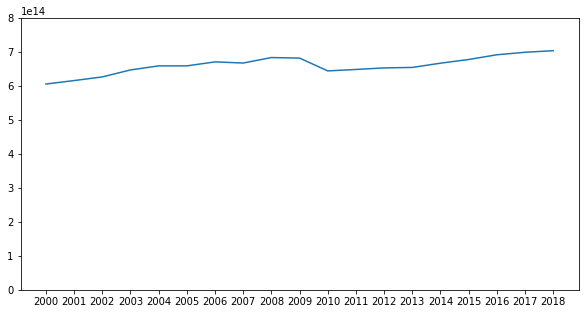

In [17]:
years = np.array([2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018])
vtypes = ['pedal_cycles', 'two_wheeled_motor_vehicles','cars_and_taxis','buses_and_coaches','lgvs','all_hgvs']
plt.figure(figsize=(10,5))
plt.plot(years, y_km)
plt.ylim(0, 8e14)
plt.xticks(years)
plt.show()

## Task 2

In [18]:
pred_years = np.linspace(2000,2030,16)

In [19]:
pred_years

array([2000., 2002., 2004., 2006., 2008., 2010., 2012., 2014., 2016.,
       2018., 2020., 2022., 2024., 2026., 2028., 2030.])

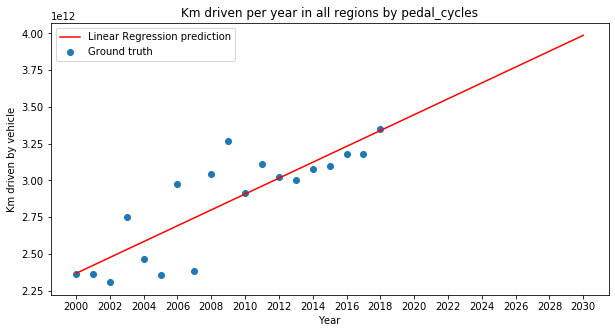

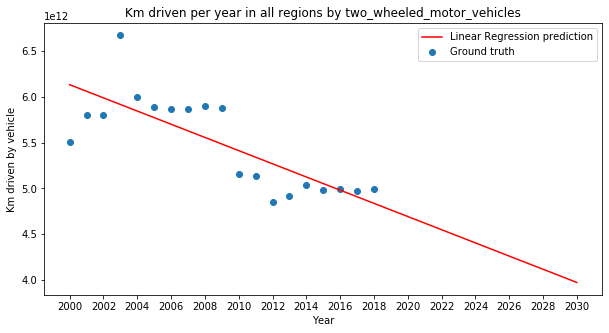

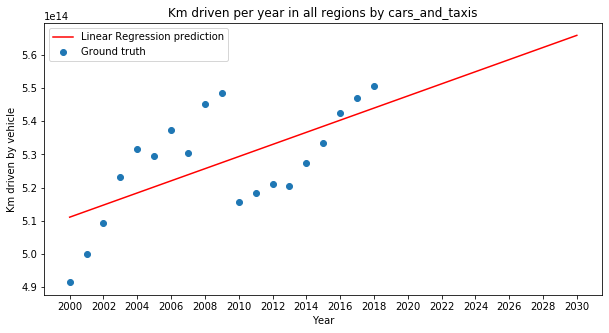

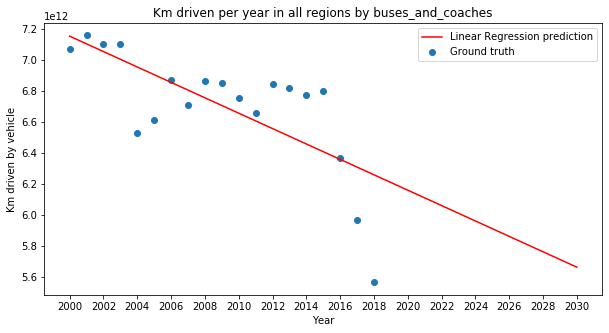

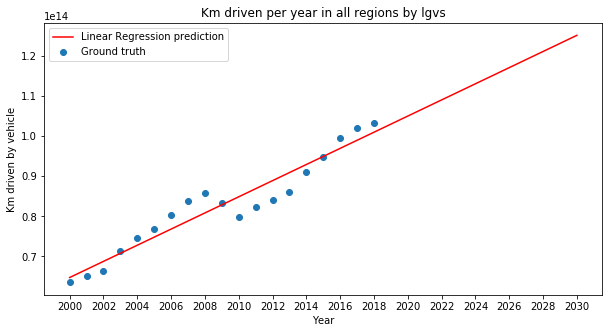

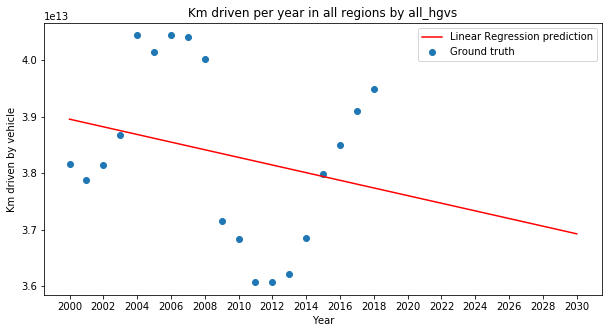

In [20]:
for i in range(6):
    w, c = np.polyfit(years, v_y_km[:,i], 1)
    plt.figure(figsize=(10,5))
    plt.title('Km driven per year in all regions by ' + vtypes[i])
    plt.xlabel('Year')
    plt.ylabel('Km driven by vehicle')
    plt.scatter(years, v_y_km[:,i])
    plt.plot(pred_years, pred_years*w + c, color='Red')
    plt.legend(['Linear Regression prediction', 'Ground truth'])
    plt.xticks(pred_years)
    plt.show()


## Task 3

In [27]:
e_years = [2014,2015,2016,2017,2018,2019]
e_years_pred = np.linspace(2019,2030,12)
e_y = [14565,24812,35344,49910,66094,100967]
e_y_pred = [100967,143587.288,204198.4933,290394.9593,412976.7612,587302.9122,835215.7872,1187777.886,1689163.839,2402195.317,3416212.334,4858267.198]


In [28]:
e_years_pred

array([2019., 2020., 2021., 2022., 2023., 2024., 2025., 2026., 2027.,
       2028., 2029., 2030.])

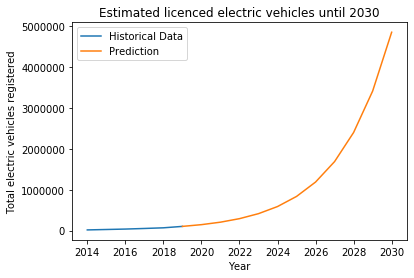

In [29]:
plt.plot(e_years,e_y)
plt.plot(e_years_pred,e_y_pred)
plt.title('Estimated licenced electric vehicles until 2030')
plt.ylabel('Total electric vehicles registered')
plt.xlabel('Year')
plt.legend(['Historical Data', 'Prediction'])
plt.show()